In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import uproot
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split




In [ ]:

file_path = r"C:\Users\Agastya\OneDrive\Desktop\train_rooot_file.root"

tree = uproot.open(file_path)["deepntuplizer/tree"]

feature_cols = [
    "fj_pt", "fj_eta", "fj_phi", "fj_mass", "fj_sdmass",
    "fj_tau1", "fj_tau2", "fj_tau3", "fj_tau21", "fj_tau32",
    "fj_jetNTracks", "fj_nSV", "fj_sdn2",
    "fj_sdsj1_csv", "fj_sdsj2_csv",
    "pfDeepCSVJetTags_probb", "pfDeepCSVJetTags_probbb",
    "pfDeepCSVJetTags_probc", "pfDeepCSVJetTags_probcc",
    "fj_doubleb",
]


label_col = "fj_isH"

data = tree.arrays(feature_cols + [label_col], library="pd")

data["label"] = data[label_col].astype(int)

data = data.dropna(subset=feature_cols)

print("Data loaded:", data.shape)
print("Class balance:")
print(data["label"].value_counts())

data.head()



Data loaded: (200000, 22)
Class balance:
label
0    175246
1     24754
Name: count, dtype: int64


,fj_pt,fj_eta,fj_phi,fj_mass,fj_sdmass,fj_tau1,fj_tau2,fj_tau3,fj_tau21,fj_tau32,...,fj_sdn2,fj_sdsj1_csv,fj_sdsj2_csv,pfDeepCSVJetTags_probb,pfDeepCSVJetTags_probbb,pfDeepCSVJetTags_probc,pfDeepCSVJetTags_probcc,fj_doubleb,fj_isH,label
0,448.633636,-0.277724,-2.183877,68.060570,4.911332,0.067988,0.059589,0.044930,0.876467,0.753994,...,0.000073,0.072580,0.071605,0.0,0.0,0.0,0.0,-0.760041,0,0
1,868.861389,-0.716812,2.365500,161.474731,34.992409,0.111101,0.087648,0.072055,0.788904,0.822090,...,0.001675,0.133219,0.062745,0.0,0.0,0.0,0.0,-0.853918,0,0
2,573.674377,0.219193,0.296306,86.054962,13.481631,0.073106,0.061262,0.049685,0.837985,0.811027,...,0.000554,0.536389,0.155396,0.0,0.0,0.0,0.0,0.528992,0,0
3,206.318527,0.336462,2.244762,35.347668,18.484650,0.132059,0.086257,0.064672,0.653168,0.749767,...,0.005919,0.322999,-10.000000,0.0,0.0,0.0,0.0,-0.677520,0,0
4,1068.199097,0.889782,-2.385019,139.384796,99.316536,0.116926,0.040401,0.032547,0.345525,0.805614,...,0.012706,0.916934,0.995029,0.0,0.0,0.0,0.0,0.455310,1,1


In [23]:
import uproot
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


train_path = r"C:\Users\Agastya\OneDrive\Desktop\train_rooot_file.root"
test_path  = r"C:\Users\Agastya\OneDrive\Desktop\test_root_file.root"

train_tree = uproot.open(train_path)["deepntuplizer/tree"]
test_tree  = uproot.open(test_path)["deepntuplizer/tree"]

feature_cols = [
    "fj_pt", "fj_eta", "fj_phi", "fj_mass",
    "fj_sdmass", "fj_tau1", "fj_tau2", "fj_tau21",
    "npv", "rho"
]

label_col = "fj_isBB"

def load_data(tree, feature_cols, label_col):
    df = tree.arrays(feature_cols + [label_col], library="pd")
    df = df.rename(columns={label_col: "is_Higgs"})
    df = df.dropna()
    return df

train_df = load_data(train_tree, feature_cols, label_col)
test_df  = load_data(test_tree, feature_cols, label_col)

X_train = train_df[feature_cols].values.astype(np.float32)
y_train = train_df["is_Higgs"].values.astype(np.int64)

X_test  = test_df[feature_cols].values.astype(np.float32)
y_test  = test_df["is_Higgs"].values.astype(np.int64)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)
print(train_df["is_Higgs"].value_counts())
print(test_df["is_Higgs"].value_counts())



Training shape: (200000, 10)
Test shape: (200000, 10)
is_Higgs
0    167024
1     32976
Name: count, dtype: int64
is_Higgs
0    166873
1     33127
Name: count, dtype: int64


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader


X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32).unsqueeze(1)


X_train_t = X_train_t.to(device)
y_train_t = y_train_t.to(device)
X_test_t  = X_test_t.to(device)
y_test_t  = y_test_t.to(device)


train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset  = TensorDataset(X_test_t, y_test_t)

default_batch = 64

train_loader = DataLoader(train_dataset, batch_size=default_batch, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=default_batch, shuffle=False)


print(" PyTorch Dataloaders ready!")
print("Train batches:", len(train_loader))
print("Test batches :", len(test_loader))
print("Feature dimension:", X_train_t.shape[1])
print("=====================================")


✅ Using device: cuda
✅ PyTorch Dataloaders ready!
Train batches: 3125
Test batches : 3125
Feature dimension: 10


In [24]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader

def objective(trial):


    hidden1   = trial.suggest_int("hidden1", 32, 256)
    hidden2   = trial.suggest_int("hidden2", 16, 128)
    dropout1  = trial.suggest_float("dropout1", 0.1, 0.5)
    dropout2  = trial.suggest_float("dropout2", 0.1, 0.5)
    lr        = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    train_loader_tune = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader_tune   = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    class TunedHiggs(nn.Module):
        def __init__(self, input_dim):
            super().__init__()
            self.model = nn.Sequential(
                nn.Linear(input_dim, hidden1),
                nn.ReLU(),
                nn.BatchNorm1d(hidden1),
                nn.Dropout(dropout1),

                nn.Linear(hidden1, hidden2),
                nn.ReLU(),
                nn.BatchNorm1d(hidden2),
                nn.Dropout(dropout2),

                nn.Linear(hidden2, 1)
            )

        def forward(self, x):
            return self.model(x)

    model = TunedHiggs(X_train.shape[1]).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    EPOCHS = 5
    for epoch in range(EPOCHS):
        model.train()
        for xb, yb in train_loader_tune:
            xb, yb = xb.to(device), yb.to(device)

            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        logits = model(X_test_t)
        probs = torch.sigmoid(logits).cpu().numpy().ravel()

    true_labels = y_test_t.cpu().numpy().ravel()
    auc = roc_auc_score(true_labels, probs)

    return auc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

print(" Best AUC:", study.best_value)
print(" Best Params:", study.best_params)

best_params = study.best_params


[I 2025-11-22 15:33:35,391] A new study created in memory with name: no-name-5559ae68-f1a0-4a99-8b0d-0f1216137152
[I 2025-11-22 15:36:45,081] Trial 0 finished with value: 0.8769765306940867 and parameters: {'hidden1': 115, 'hidden2': 61, 'dropout1': 0.12240718082042568, 'dropout2': 0.3450679817070259, 'lr': 8.368913158865877e-05, 'batch_size': 64}. Best is trial 0 with value: 0.8769765306940867.
[I 2025-11-22 15:39:51,113] Trial 1 finished with value: 0.8840345735295428 and parameters: {'hidden1': 43, 'hidden2': 56, 'dropout1': 0.38716677378894293, 'dropout2': 0.3110205576530404, 'lr': 0.0005607606043821719, 'batch_size': 64}. Best is trial 1 with value: 0.8840345735295428.
[I 2025-11-22 15:41:43,671] Trial 2 finished with value: 0.858181742916418 and parameters: {'hidden1': 218, 'hidden2': 46, 'dropout1': 0.4898199963982238, 'dropout2': 0.26744519704179837, 'lr': 2.7170068282128597e-05, 'batch_size': 128}. Best is trial 1 with value: 0.8840345735295428.
[I 2025-11-22 15:44:48,418] Tri

 Best AUC: 0.8895249124817093
 Best Params: {'hidden1': 194, 'hidden2': 34, 'dropout1': 0.12718534400214668, 'dropout2': 0.22553435594524776, 'lr': 0.004865229869057776, 'batch_size': 128}


In [25]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class HiggsClassifier(nn.Module):
    def __init__(self, input_dim, params):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, params["hidden1"]),
            nn.ReLU(),
            nn.BatchNorm1d(params["hidden1"]),
            nn.Dropout(params["dropout1"]),

            nn.Linear(params["hidden1"], params["hidden2"]),
            nn.ReLU(),
            nn.BatchNorm1d(params["hidden2"]),
            nn.Dropout(params["dropout2"]),

            nn.Linear(params["hidden2"], 1)        # binary classification -> output logits
        )

    def forward(self, x):
        return self.model(x)


val_dataset = TensorDataset(X_test_t, y_test_t)

input_dim = X_train.shape[1]

model = HiggsClassifier(input_dim, best_params).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=best_params["lr"])

batch_size = best_params["batch_size"]

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


model.train()

for epoch in range(epochs):
    running_loss = 0.0

    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device).float().view(-1,1)

        optimizer.zero_grad()

        logits = model(X)
        loss = criterion(logits, y)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}  Loss: {running_loss/len(train_loader):.4f}")


model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in val_loader:
        X = X.to(device)
        y = y.to(device)

        logits = model(X)
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).int().view(-1)

        correct += (preds == y).sum().item()
        total += y.size(0)

accuracy = correct / total
print("Validation Accuracy:", accuracy)


Epoch 1/20  Loss: 0.3058
Epoch 2/20  Loss: 0.2862
Epoch 3/20  Loss: 0.2840
Epoch 4/20  Loss: 0.2828
Epoch 5/20  Loss: 0.2816
Epoch 6/20  Loss: 0.2816
Epoch 7/20  Loss: 0.2816
Epoch 8/20  Loss: 0.2803
Epoch 9/20  Loss: 0.2804
Epoch 10/20  Loss: 0.2799
Epoch 11/20  Loss: 0.2796
Epoch 12/20  Loss: 0.2792
Epoch 13/20  Loss: 0.2793
Epoch 14/20  Loss: 0.2791
Epoch 15/20  Loss: 0.2786
Epoch 16/20  Loss: 0.2785
Epoch 17/20  Loss: 0.2786
Epoch 18/20  Loss: 0.2779
Epoch 19/20  Loss: 0.2784
Epoch 20/20  Loss: 0.2780
Validation Accuracy: 99.00791


In [26]:
from sklearn.metrics import accuracy_score

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device).float().view(-1, 1) 

        optimizer.zero_grad()
        logits = model(xb)               
        loss = criterion(logits, yb)     
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    model.eval()
    with torch.no_grad():
        X_test_device = X_test_t.to(device)
        y_test_device = y_test_t.to(device).float().view(-1, 1)

        logits = model(X_test_device)
        probs = torch.sigmoid(logits)              
        preds_label = (probs > 0.5).float()       

        acc = accuracy_score(y_test_device.cpu().numpy(),
                             preds_label.cpu().numpy())

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {total_loss/len(train_loader):.4f} | "
          f"Test Accuracy: {acc:.4f}")


Epoch [1/10] | Train Loss: 0.2783 | Test Accuracy: 0.8952
Epoch [2/10] | Train Loss: 0.2771 | Test Accuracy: 0.8938
Epoch [3/10] | Train Loss: 0.2777 | Test Accuracy: 0.8953
Epoch [4/10] | Train Loss: 0.2774 | Test Accuracy: 0.8946
Epoch [5/10] | Train Loss: 0.2773 | Test Accuracy: 0.8953
Epoch [6/10] | Train Loss: 0.2772 | Test Accuracy: 0.8948
Epoch [7/10] | Train Loss: 0.2777 | Test Accuracy: 0.8950
Epoch [8/10] | Train Loss: 0.2772 | Test Accuracy: 0.8946
Epoch [9/10] | Train Loss: 0.2768 | Test Accuracy: 0.8956
Epoch [10/10] | Train Loss: 0.2770 | Test Accuracy: 0.8926


In [27]:
from sklearn.metrics import classification_report

model.eval()
with torch.no_grad():
    
    logits = model(X_test_t.to(device))
    
    
    probs = torch.sigmoid(logits).cpu().numpy().flatten()  


y_pred_labels = (probs > 0.5).astype(int)


y_true = y_test_t.cpu().numpy().flatten()

print("=== Classification Report ===")
print(classification_report(
    y_true, 
    y_pred_labels, 
    target_names=["Not Higgs", "Higgs"], 
    zero_division=0
))


=== Classification Report ===
              precision    recall  f1-score   support

   Not Higgs       0.90      0.98      0.94    166873
       Higgs       0.82      0.45      0.58     33127

    accuracy                           0.89    200000
   macro avg       0.86      0.71      0.76    200000
weighted avg       0.89      0.89      0.88    200000



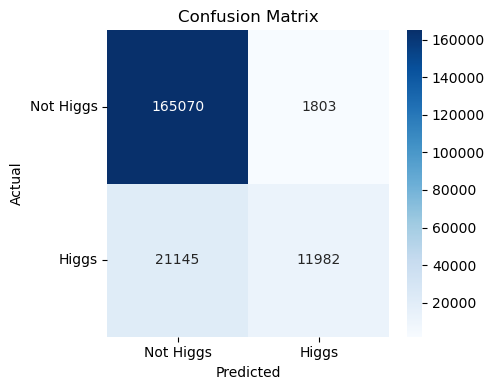

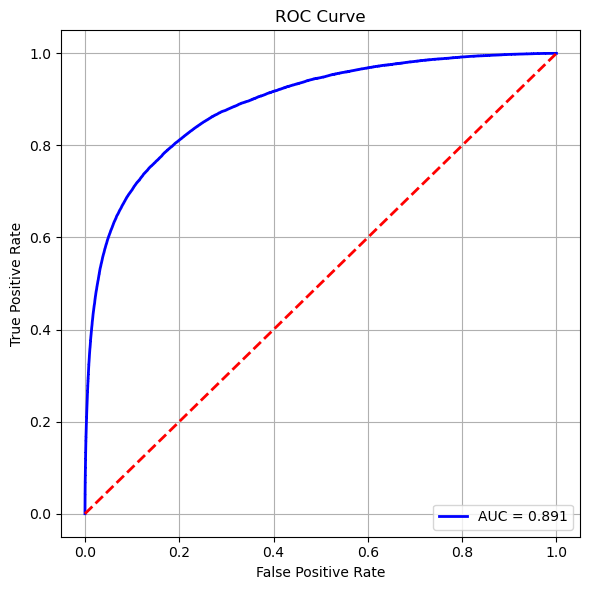

In [28]:
import torch
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


model.eval()

with torch.no_grad():
    y_pred = model(X_test_t.to(device)).cpu().numpy().ravel()  

y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["Not Higgs", "Higgs"])
plt.yticks([0.5, 1.5], ["Not Higgs", "Higgs"], rotation=0)
plt.tight_layout()
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred)  
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
